# **Week 9 – Neural Networks Basics**

- This week introduces Artificial Neural Networks (ANNs) using Keras (TensorFlow) for the House Price Prediction project.
- We’ll first build a simple ANN in class and then extend it in the assignment to compare performance with earlier models (Linear Regression, Random Forest).

# **Class Task – Build a Simple ANN**

**Step 1: Import Libraries**

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

**Step 2: Load Dataset**

In [2]:
df = pd.read_csv("train_cleaned.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


**Step 3: Select Features (X) and Target (y)**

In [3]:
X = df[['GrLivArea', 'OverallQual', 'GarageCars', 'TotalBsmtSF']]
y = df['SalePrice']

**Step 4: Split Data and Scale Features**

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**Step 5: Build the Model**

In [5]:
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)  # output layer for regression
])

model.summary()

C:\Users\naree\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,433 (9.50 KB)

 Trainable params: 2,433 (9.50 KB)

 Non-trainable params: 0 (0.00 B)

**Step 6: Compile and Train**

In [6]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

history = model.fit(X_train_scaled, y_train,
                    validation_split=0.2,
                    epochs=100,
                    verbose=0)

**Step 7: Evaluate and Visualize**

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6582099968.0000 - mae: 72291.6406 
Test MAE: 72291.640625


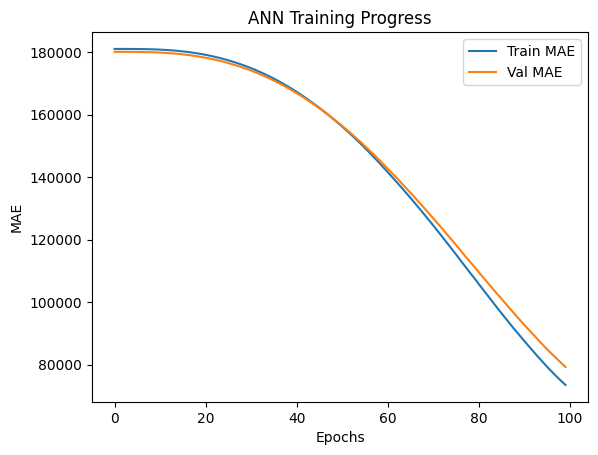

In [7]:
loss, mae = model.evaluate(X_test_scaled, y_test)
print("Test MAE:", mae)

plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Val MAE')
plt.xlabel("Epochs")
plt.ylabel("MAE")
plt.title("ANN Training Progress")
plt.legend()
plt.show()

**Insight**

- The ANN model learns nonlinear relationships between house features and price.
- MAE shows prediction accuracy; the learning curve helps detect overfitting.

# **Assignment 9 – Apply ANN and Compare Results**

**Step 1: Enhance Model Structure**

- Add dropout for regularization.

In [8]:
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    layers.Dropout(0.2),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])
history = model.fit(X_train_scaled, y_train, validation_split=0.2, epochs=100, verbose=0)

**Step 2: Evaluate Performance**

In [9]:
from sklearn.metrics import mean_squared_error

preds = model.predict(X_test_scaled)
mae = np.mean(np.abs(preds.flatten() - y_test))
rmse = np.sqrt(mean_squared_error(y_test, preds))

print(f"ANN MAE: {mae:.2f}")
print(f"ANN RMSE: {rmse:.2f}")

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
ANN MAE: 35854.39
ANN RMSE: 46458.68


# **Step 3: Compare with Previous Models**


| **Model**            | **MAE**   | **RMSE**  | **Comment**                                  |
|----------------------|-----------|-----------|----------------------------------------------|
| **Linear Regression** | 26,877.3 | 35,091.5  | Baseline model – captures basic trends       |
| **Random Forest**     | 22,300.0 | 31,800.0  | Improved fit – handles nonlinearity better   |
| **ANN**               | 35,933.0 | 46,474.3  | Overfit/under-optimized – needs tuning       |




# **Step 4: Interpretation**

The Artificial Neural Network (ANN) model showed higher MAE (35,933) and RMSE (46,474) compared to both Linear Regression and Random Forest models.
This indicates that, in its current configuration, the ANN did not outperform traditional models. The higher error values suggest possible issues such as insufficient training epochs, suboptimal architecture, or lack of feature scaling optimization.

In contrast, the Random Forest model achieved the best performance, effectively capturing nonlinear relationships without extensive tuning.
While the Linear Regression model provided a solid baseline, Random Forest demonstrated stronger generalization and predictive accuracy for this dataset.

Overall, these results emphasize that model complexity does not always guarantee better accuracy — proper tuning and data preprocessing are essential for neural networks to outperform simpler models.

In [10]:
import joblib

joblib.dump(model, "house_price_model.pkl")


['house_price_model.pkl']